<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Energy efficiency - Predict Heating Load and Cooling Load</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-06-11 07:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Dinh Viet Ha
- Date of birth: December 12th 1995
- Place of birth: Ho Chi Minh City
- Email: dinhvietha5000@gmail.com
- Mobile phone: (+84)0775632566

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "heating load and cooling load" by accuracy evaluation methods.

Please read [Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) carefully before you do this project!

Dataset: ENB2012_data.xlsx

### Attribute Information:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

#### Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Data exploration

In [2]:
data = pd.read_excel("./ENB2012_data.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
data.shape

(768, 10)

In [6]:
data.isnull().any()

X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X7    False
X8    False
Y1    False
Y2    False
dtype: bool

In [7]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
# Identify Variables
# Univariate Analysis
# Bi-variate Analysis
# Handle the Missing Values
# Handle Outlier Values

In [9]:
for col in data.columns:
    print(col)
    print(data[col].unique() if len(data[col].unique()) < 100 else "")

X1
[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
X2
[514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
X3
[294.  318.5 343.  416.5 245.  269.5 367.5]
X4
[110.25 122.5  147.   220.5 ]
X5
[7.  3.5]
X6
[2 3 4 5]
X7
[0.   0.1  0.25 0.4 ]
X8
[0 1 2 3 4 5]
Y1

Y2



In [10]:
attributes = ['relative compactness','surface area', 'wall area', 'roof area', 'overall height', 
              'orientation', 'glazing area', 'glazing area distribution','heating load','cooling load']

In [11]:
data.columns = attributes

In [12]:
data.head()

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Attributes Determination

|Type of variable|Data Type|Variable Category|
|----------------|---------|-----------------|
|Predictor variable|Character|Categorical|
|<ul><li>relative compactness</li><li>surface area</li><li>overall height</li><li>orientation</li><li>glazing area distribution</li><li>glazing area</li></ul>|<ul>none</ul>|<ul><li>orientation</li><li>glazing area</li><li>glazing area distribution</li></ul>|
|Target Variable|Numeric|Continuous|
|<ul><li>Heating Load</li><li>Cooling Load</li></ul>|<ul><li>relative compactness</li><li>surface area</li><li>wall area</li><li>roof area</li><li>overall height</li><li>orientation</li><li>glazing area</li><li>glazing area distribution</li></ul>|<ul><li>relative compactness</li><li>surface area</li><li>wall area</li><li>roof area</li><li>Heating Load</li><li>Cooling Load</li></ul>|

# Univariate analysis

### Distribution

In [13]:
import seaborn as sns

In [14]:
def dist_plot(data):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.hist(data.dropna())
    plt.subplot(1,2,2)
    sns.distplot(data.dropna())

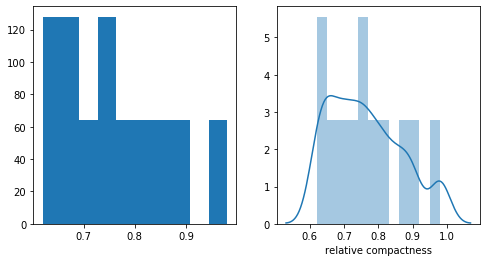

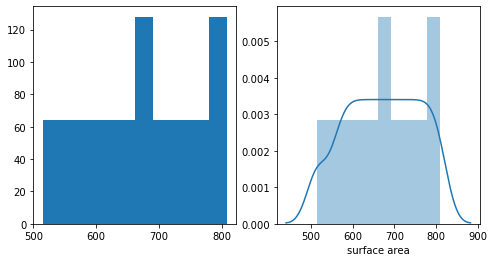

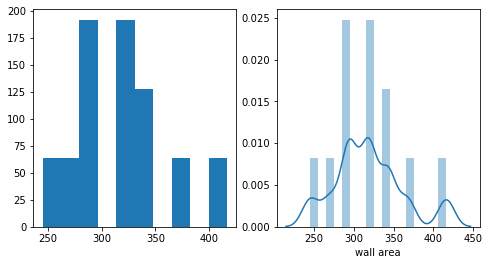

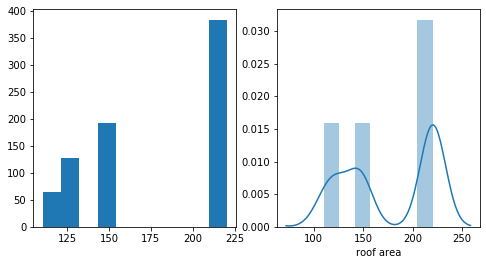

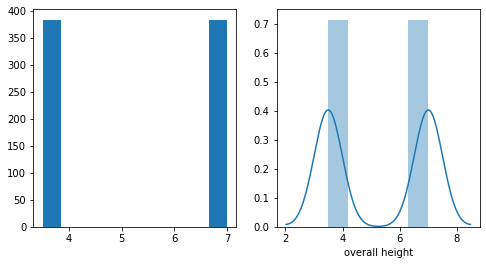

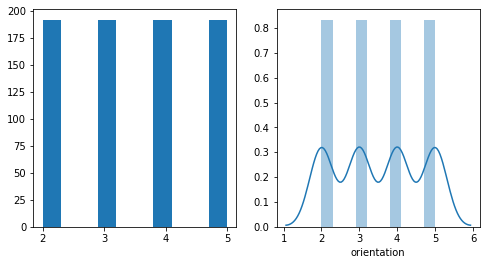

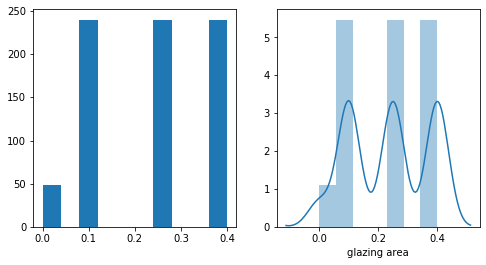

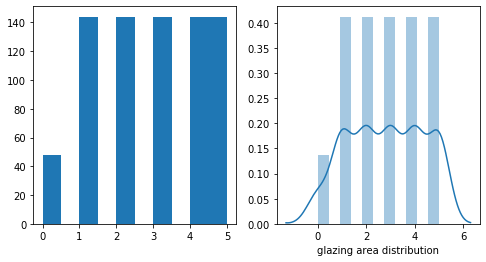

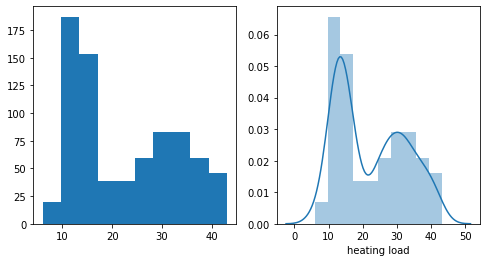

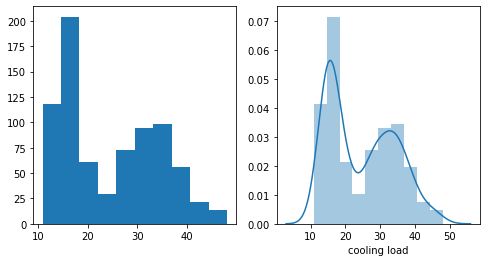

In [15]:
for col in data.columns:
    dist_plot(data[col])
    plt.show()

# Bivariate Analysis

## Continuous Variables

### Correlation

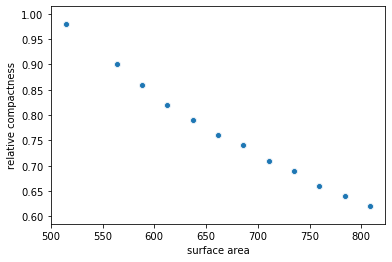

In [16]:
sns.scatterplot(data['surface area'], data['relative compactness'])
plt.show()

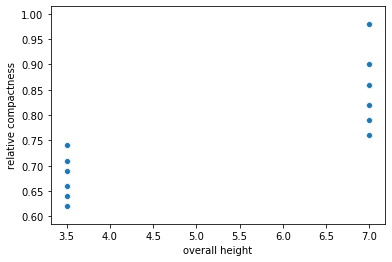

In [17]:
sns.scatterplot(data['overall height'], data['relative compactness'])
plt.show()

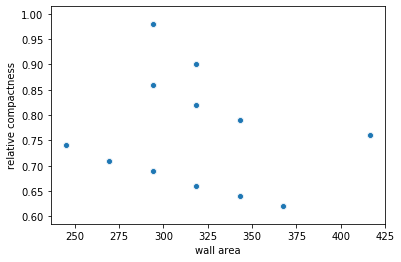

In [18]:
sns.scatterplot(data['wall area'], data['relative compactness'])
plt.show()

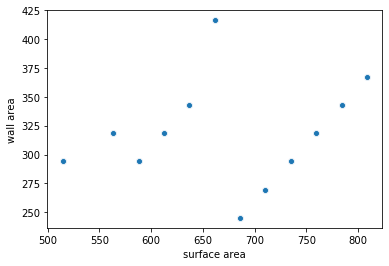

In [19]:
sns.scatterplot(data['surface area'], data['wall area'])
plt.show()

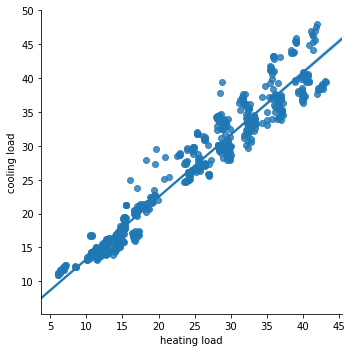

In [20]:
sns.lmplot(x='heating load',y='cooling load', data=data)
plt.show()

In [21]:
np.corrcoef(data['heating load'],data['cooling load'])

array([[1.        , 0.97586174],
       [0.97586174, 1.        ]])

Heating and cooling load have a positive linear relationship with correlation coefficient of 0.98.

--> Effect of variables on heating load could be similar to that on cooling load.

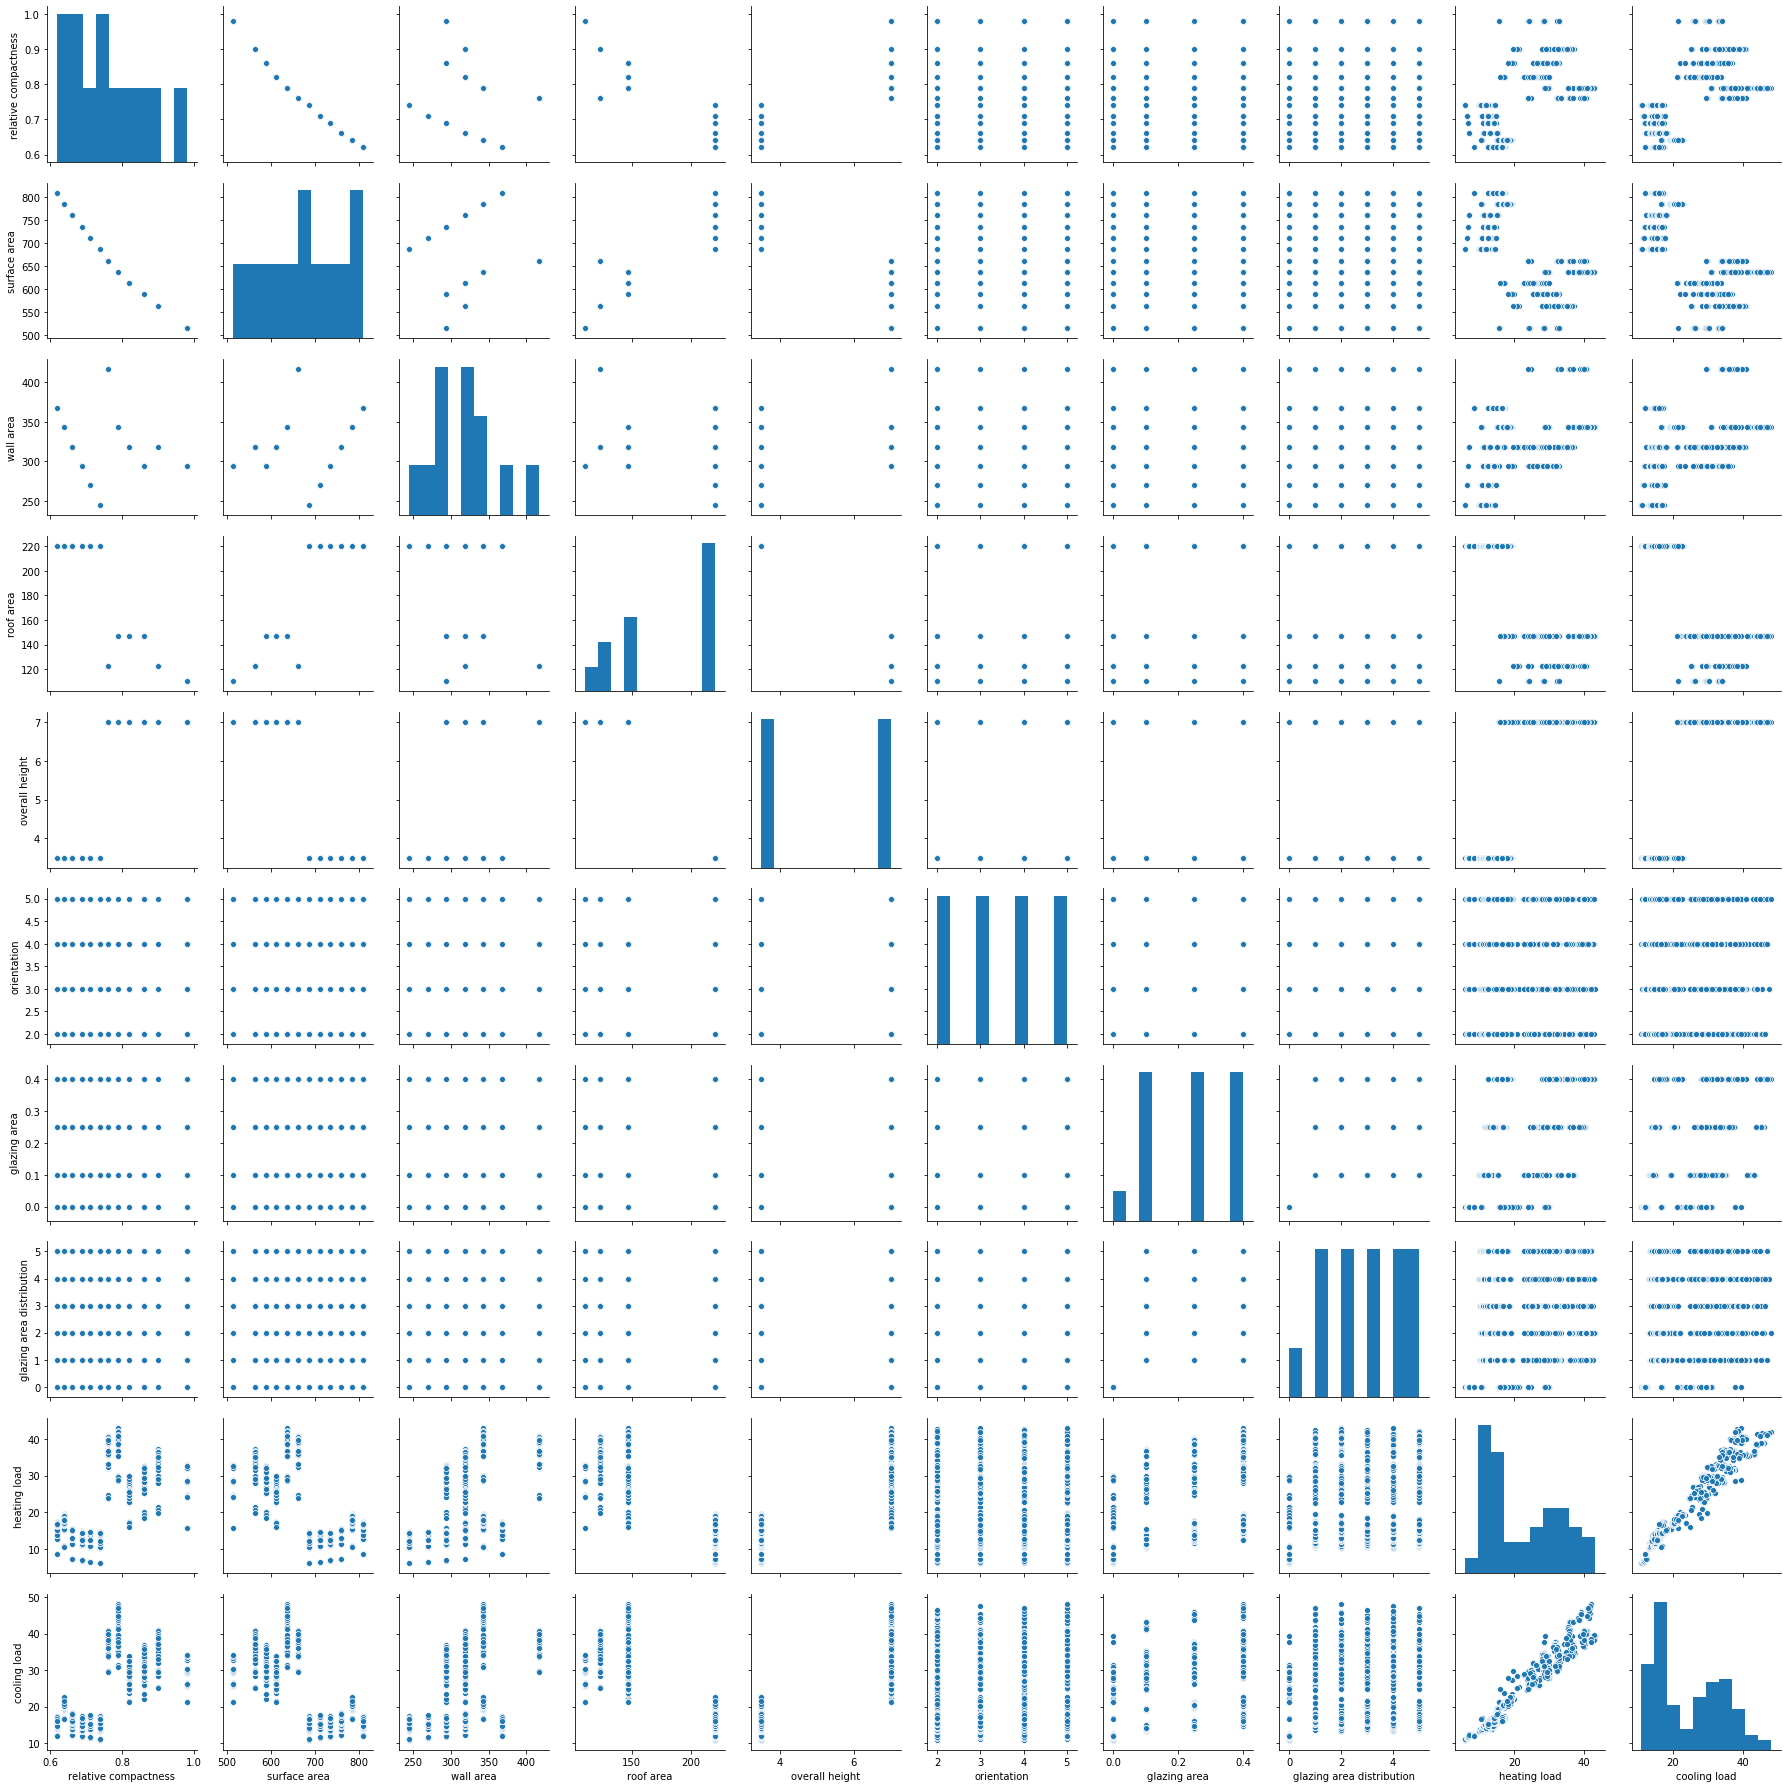

In [22]:
sns.pairplot(data)
plt.show()

**Comment**

Relative compactness and surface area tend to have negative linear relationship.

Relative compactness and wall area relationship can be explained by dividing into two groups by high relative compactness (>=0.75) and low relative compactness (< 0.75).

There are only two types of buldings: tall (7m) and short (3.5m).

4 types of building orientation could be : east, west, south, north.

Relative compactness, surface area, wall area have linear relationship with heating load and cooling load, and could be divided into 2 groups to explain this relation.

Roof area has linear relationship with heating and cooling load for values below 150, after 150, roof area does not affect heating and cooling load anymore.

Buildings with larger height (7) has higher heating and cooling load than buildings with smaller height (3.5).

## Categorical Variables

In [23]:
GLarea_Or_table = pd.crosstab(data['glazing area'], data['orientation'])
GLarea_Or_table

orientation,2,3,4,5
glazing area,,,,
0.00,12,12,12,12
0.10,60,60,60,60
0.25,60,60,60,60
0.40,60,60,60,60


In [24]:
GLareadis_Or_table = pd.crosstab(data['glazing area distribution'], data['orientation'])
GLareadis_Or_table

orientation,2,3,4,5
glazing area distribution,,,,
0,12,12,12,12
1,36,36,36,36
2,36,36,36,36
3,36,36,36,36
4,36,36,36,36
5,36,36,36,36


In [25]:
Hei_Or_table = pd.crosstab(data['overall height'], data['orientation'])
Hei_Or_table

orientation,2,3,4,5
overall height,,,,
3.5,96,96,96,96
7.0,96,96,96,96


In [26]:
GLarea_Hei_table = pd.crosstab(data['glazing area'],data['overall height'])
GLarea_Hei_table

overall height,3.5,7.0
glazing area,,
0.00,24,24
0.10,120,120
0.25,120,120
0.40,120,120


In [27]:
GLareadis_Hei_table = pd.crosstab(data['glazing area distribution'], data['overall height'])
GLareadis_Hei_table

overall height,3.5,7.0
glazing area distribution,,
0,24,24
1,72,72
2,72,72
3,72,72
4,72,72
5,72,72


This sample of buildings were generated by simulation; therefore, the input variables are controled, in which equal number of buldings for each category of glazing area, height and orientation.

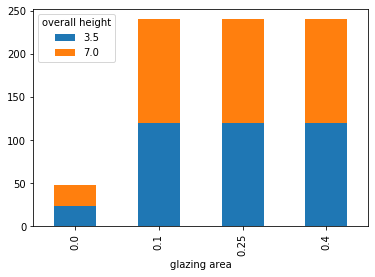

In [28]:
GLarea_Hei_table.plot(kind="bar", stacked=True)

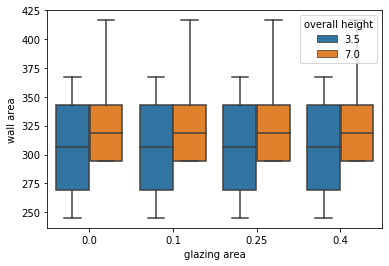

In [29]:
sns.boxplot(x='glazing area', y='wall area', hue='overall height', data=data)
plt.show()

Taller buildings have shorter range of wall area (300-340) while shorter buildings have wide range of wall area ( 260-340).

#### Chi squared test

In [30]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

##### Glaze Area and Overall Height

In [31]:
GLarea_Hei_table

overall height,3.5,7.0
glazing area,,
0.00,24,24
0.10,120,120
0.25,120,120
0.40,120,120


In [32]:
def chi2_test(table):
    stat, p, dof, expected = chi2_contingency(table)
    print("dof=%d" % dof)
    print(expected)
    
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    print("probability=%.3f, critical=%.3f, stat=%.3f" %(prob, critical, stat))
    
    alpha = 1.0 - prob
    print("significance=%.3f, p=%.3f" %(alpha,p))
    if p <= alpha:
        print("Dependent(reject H0)")
    else:
        print("Independent (fail to reject H0)")
        
    if abs(stat) >= critical:
        print("Dependent(reject H0)")
    else:
        print("Independent (fail to reject H0)")

In [33]:
chi2_test(GLarea_Hei_table)

dof=3
[[ 24.  24.]
 [120. 120.]
 [120. 120.]
 [120. 120.]]
probability=0.950, critical=7.815, stat=0.000
significance=0.050, p=1.000
Independent (fail to reject H0)
Independent (fail to reject H0)


#### Glazing area and glazing distribution

In [34]:
GL2_table = pd.crosstab(data['glazing area'],data['glazing area distribution'])
GL2_table

glazing area distribution,0,1,2,3,4,5
glazing area,,,,,,
0.00,48,0,0,0,0,0
0.10,0,48,48,48,48,48
0.25,0,48,48,48,48,48
0.40,0,48,48,48,48,48


In [35]:
chi2_test(GL2_table)

dof=15
[[ 3.  9.  9.  9.  9.  9.]
 [15. 45. 45. 45. 45. 45.]
 [15. 45. 45. 45. 45. 45.]
 [15. 45. 45. 45. 45. 45.]]
probability=0.950, critical=24.996, stat=768.000
significance=0.050, p=0.000
Dependent(reject H0)
Dependent(reject H0)


## Continuous and Categorical Variables

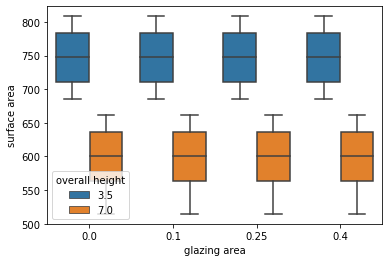

In [36]:
sns.boxplot(x='glazing area', y='surface area', hue='overall height', data=data)
plt.show()

Tall buldings have smaller surface area.

#### ANOVA

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
data_sub = data[['surface area', 'overall height', 'glazing area', 'heating load']]

In [39]:
data_sub = data_sub.rename({'surface area': 'surface_area', 'overall height':'overall_height',
                            'glazing area': 'glazing_area', 'heating load': 'heating_load'}, axis=1)

In [40]:
data_sub.head()

,surface_area,overall_height,glazing_area,heating_load
0,514.5,7.0,0.0,15.55
1,514.5,7.0,0.0,15.55
2,514.5,7.0,0.0,15.55
3,514.5,7.0,0.0,15.55
4,563.5,7.0,0.0,20.84


##### Glazing area, overall height on heating load

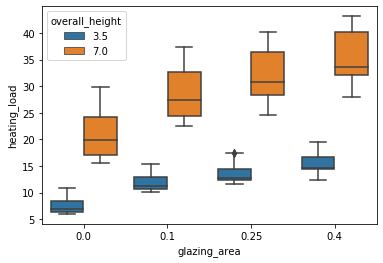

In [41]:
sns.boxplot(x='glazing_area', y='heating_load', hue='overall_height', data=data_sub)
plt.show()

The taller a building, the higher heating load.
The higher glazing area, the higher heating load.

In [42]:
model = ols("(heating_load) ~ C(glazing_area) + C(overall_height) + C(glazing_area):C(overall_height)", data=data_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(glazing_area),6362.235624,3.0,170.965510,1.081488e-84
C(overall_height),61775.924878,1.0,4980.113810,0.000000e+00
C(glazing_area):C(overall_height),524.373555,3.0,14.090926,6.030245e-09
Residual,9427.435738,760.0,NaN,NaN


The result above shows that glazing area, overall height and the combination of glazing area and overall height strongly affect heating load.

##### Surface area, glazing area on heating load

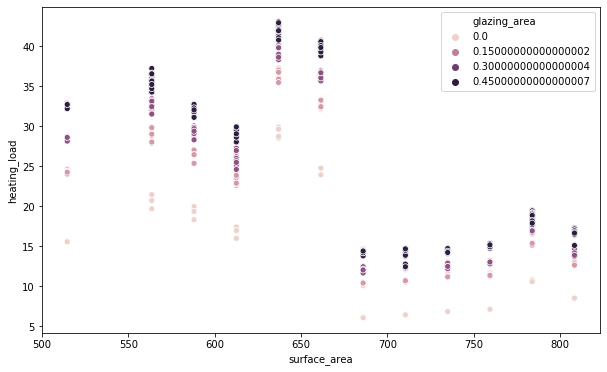

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='surface_area', y='heating_load', hue='glazing_area', data=data_sub)
plt.show()

Buildings with smaller surface area have higher heating load than buldings with larger surface area.

The higher glazing area a bulding has, the higher heating load it carries.

In [44]:
model2 = ols("(heating_load) ~ C(glazing_area) + C(surface_area) + C(glazing_area):C(surface_area)", data=data_sub).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(glazing_area),6362.235624,3.0,9683.017222,0.000000e+00
C(surface_area),70931.403107,11.0,29442.052009,0.000000e+00
C(glazing_area):C(surface_area),638.638836,33.0,88.361605,2.492692e-228
Residual,157.692227,720.0,NaN,NaN


The result above shows that glazing area, surface area and the combination of glazing area and surface area strongly affect heating load.

Since heating and cooling load has a 

**Note**: We will use **relative compactness, surface area, wall area, glazing area and glazing area distribution** to predict the **heating and cooling load**.

# Simple Linear Regression 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Predict **heating load** from **relative compactness**

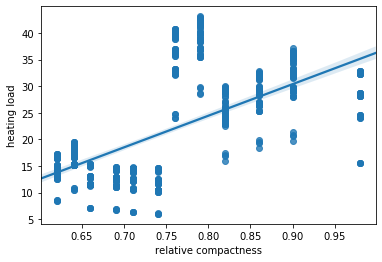

In [46]:
sns.regplot(data['relative compactness'], data['heating load'])
plt.show()

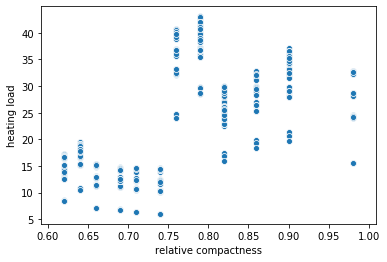

In [47]:
sns.scatterplot(data['relative compactness'], data['heating load'])
plt.show()

In [48]:
RP_lower_075 = data[data['relative compactness'] < 0.75]
RP_lower_075.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 24 to 767
Data columns (total 10 columns):
relative compactness         384 non-null float64
surface area                 384 non-null float64
wall area                    384 non-null float64
roof area                    384 non-null float64
overall height               384 non-null float64
orientation                  384 non-null int64
glazing area                 384 non-null float64
glazing area distribution    384 non-null int64
heating load                 384 non-null float64
cooling load                 384 non-null float64
dtypes: float64(8), int64(2)
memory usage: 33.0 KB


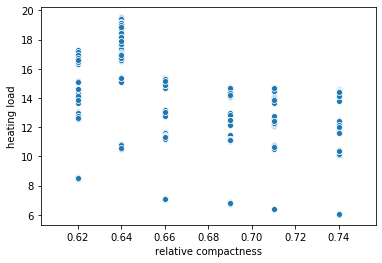

In [49]:
sns.scatterplot(RP_lower_075['relative compactness'],RP_lower_075['heating load'])
plt.show()

In [50]:
X1 = data[['relative compactness']]
y1 = data['heating load']

In [51]:
X1_lower_075 = data[['relative compactness']][data['relative compactness'] < 0.75]
X1_upper_075 = data[['relative compactness']][data['relative compactness'] >= 0.75]

In [52]:
y1_lower_075 = data['heating load'][data['relative compactness'] < 0.75]
y1_upper_075 = data['heating load'][data['relative compactness'] >= 0.75]

In [53]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lm.fit(X1_lower_075,y1_lower_075)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
b_l = lm.intercept_
m_l = lm.coef_[0]
b_l,m_l

(34.231388466282915, -30.876182154605296)

y1 = mx1 + b

heating load = 59.36* relative compactness - 23.05

In [56]:
y1Hat_l = lm.predict(X1_lower_075)
y1Hat_l[:5]

array([11.38301367, 11.38301367, 11.38301367, 11.38301367, 12.30929914])

In [57]:
print('The R-square is: ', lm.score(X1_lower_075, y1_lower_075))

The R-square is:  0.22614483095209048


Only 22.6 % variation of the lower 0.75 relative compactness dataset can be explained.

In [58]:
print('The mean squared error of relative compactness and heating load is: ', mean_squared_error(y1_lower_075,y1Hat_l))

The mean squared error of relative compactness and heating load is:  5.5096154741751695


In [59]:
reg_line = [(m_l* float(x)) + b_l for x in np.array(X1_lower_075)]

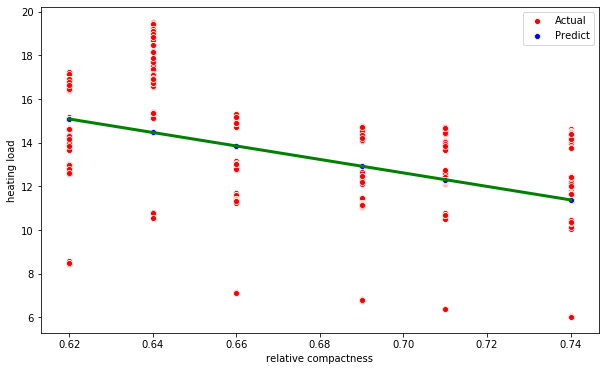

In [60]:
plt.figure(figsize=(10,6))
plt.plot(X1_lower_075, reg_line, color="green", linewidth=3)
sns.scatterplot(X1_lower_075["relative compactness"], y1_lower_075, color="red", label="Actual")
sns.scatterplot(X1_lower_075["relative compactness"], y1Hat_l, color="blue", label="Predict")
plt.xlabel("relative compactness")
plt.ylabel("heating load")
plt.show()

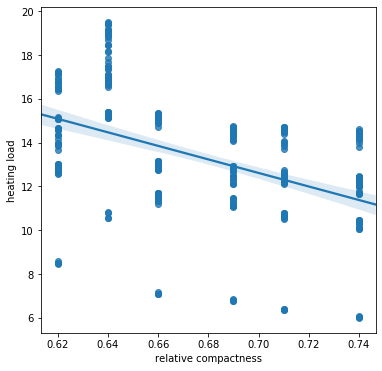

In [61]:
plt.figure(figsize=(6,6))
sns.regplot(x="relative compactness", y="heating load", data=RP_lower_075)
plt.show()

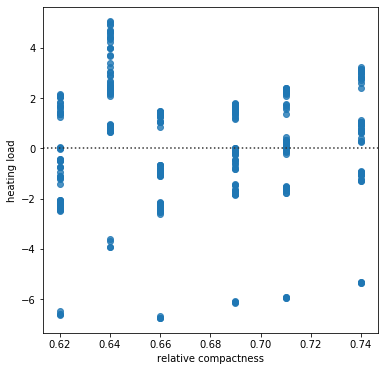

In [62]:
plt.figure(figsize=(6,6))
sns.residplot(x="relative compactness", y="heating load", data=RP_lower_075)
plt.show()

There are points lying far away from the x-axis, with the R score remain low, this linear model is not suitable to predict the heating load

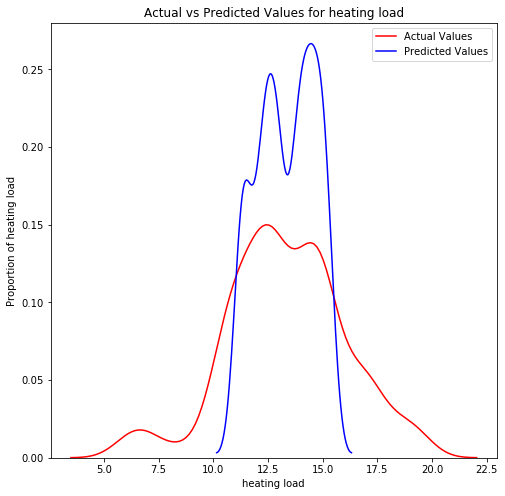

In [63]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y1_lower_075, hist=False, color="r", label="Actual Values")
sns.distplot(y1Hat_l, hist=False, color="b", label="Predicted Values", ax=ax1)

plt.title("Actual vs Predicted Values for heating load")
plt.xlabel("heating load")
plt.ylabel("Proportion of heating load")

plt.show()
plt.close()

The predicted values have smaller variance compared to the actual one.

**For upper 0.75 relative compactness**

In [64]:
lm.fit(X1_upper_075, y1_upper_075)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y1Hat_u = lm.predict(X1_upper_075)
y1Hat_u[:5]

array([26.69711875, 26.69711875, 26.69711875, 26.69711875, 29.55141485])

In [66]:
print('The R-square is: ', lm.score(X1_upper_075, y1_upper_075))

The R-square is:  0.1924753784168376


Only 19.2 % variation of the upper 0.75 relative compactness dataset can be explained.

In [67]:
print('The mean squared error of relative compactness and heating load is: ', mean_squared_error(y1_upper_075,y1Hat_u))

The mean squared error of relative compactness and heating load is:  28.557941477851916


The R^2 score is even lower compared to the lower set of relative compactness, this means this model is not suitable.

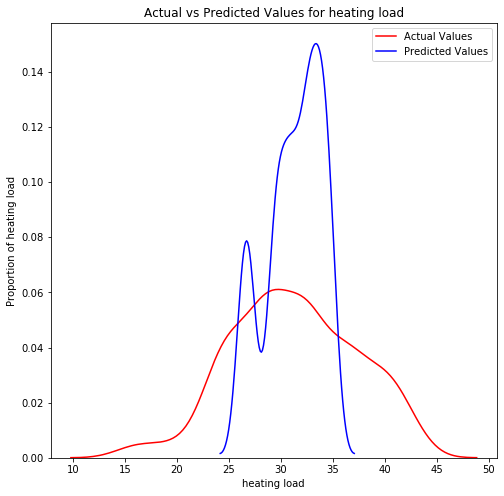

In [68]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y1_upper_075, hist=False, color="r", label="Actual Values")
sns.distplot(y1Hat_u, hist=False, color="b", label="Predicted Values", ax=ax1)

plt.title("Actual vs Predicted Values for heating load")
plt.xlabel("heating load")
plt.ylabel("Proportion of heating load")

plt.show()
plt.close()

The predicted values have smaller variance than the actual values.

# Multiple Linear Regression
## Prediction of heating load

Predict **heating load** using **relative compactness, surface area, wall area, roof area, glazing area and glazing area distribution**.

In [69]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    
    plt.title(Title)
    plt.xlabel("Heating Load")
    plt.ylabel("Proportion")

In [70]:
X = data[['relative compactness', 'surface area', 'wall area', 'roof area', 'glazing area','glazing area distribution']]
Y1 = data['heating load']

In [71]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X,Y1, test_size=0.2, random_state=42)

In [72]:
print("Number of test samples: ", X_test.shape[0])
print("Number of train samples: ", X_train.shape[0])

Number of test samples:  154
Number of train samples:  614


In [73]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
lm1.fit(X_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
lm1.score(X_train,Y1_train)

0.9005248764419925

In [76]:
lm1.score(X_test, Y1_test)

0.8944670574568674

In [77]:
lm1.score(X,Y1)

0.8993700007238106

There is a difference of 0.01 between training dataset and testing dataset.

89.9 % variation of the whole dataset can be explained using this multiple linear regression model. 

In [78]:
Y1hat =lm1.predict(X)
Y1hat[:5]

array([23.56027435, 23.56027435, 23.56027435, 23.56027435, 25.65207122])

In [79]:
mse1 = mean_squared_error(Y1, Y1hat)
print('The mean squared error of heating load and predicted value is: ', mse1)

The mean squared error of heating load and predicted value is:  10.232022921769033


In [80]:
print("The R-squared score is: ", lm1.score(X,Y1))

The R-squared score is:  0.8993700007238106


In [81]:
df_compare_LR = pd.DataFrame({"Actual": Y1.values, "Predicted": Y1hat})
df_compare_LR.head(10)

,Actual,Predicted
0,15.55,23.560274
1,15.55,23.560274
2,15.55,23.560274
3,15.55,23.560274
4,20.84,25.652071
5,21.46,25.652071
6,20.71,25.652071
7,19.68,25.652071
8,19.50,21.651095
9,19.95,21.651095


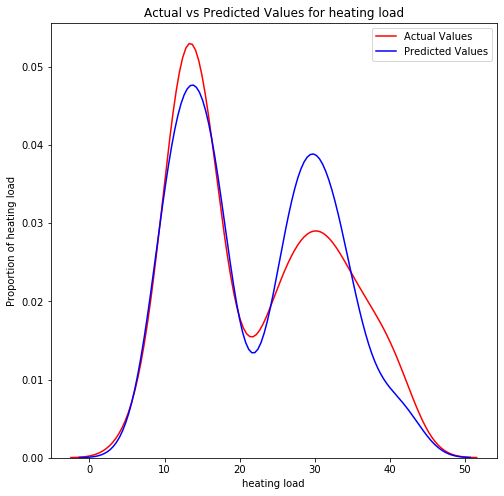

In [82]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(Y1, hist=False, color="r", label="Actual Values")
sns.distplot(Y1hat, hist=False, color="b", label="Predicted Values", ax=ax1)

plt.title("Actual vs Predicted Values for heating load")
plt.xlabel("heating load")
plt.ylabel("Proportion of heating load")

plt.show()
plt.close()

The predicted values fit well to the actual values. There are stil differences at the values that have the largest proportion in the dataset. 

#### Overfitting, Underfitting

In [83]:
Y1hat_train = lm1.predict(X_train)
Y1hat_test = lm1.predict(X_test)

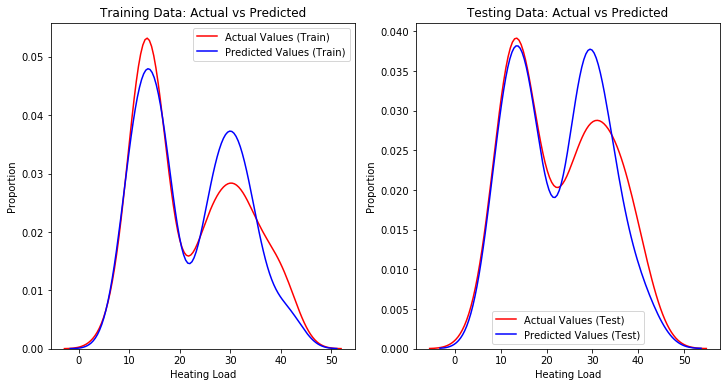

In [84]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Title = "Training Data: Actual vs Predicted"
distribution_plot(Y1_train, Y1hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
plt.subplot(1,2,2)
Title = "Testing Data: Actual vs Predicted"
distribution_plot(Y1_test, Y1hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)
plt.show()

In [85]:
Y1_train_mean = Y1_train.mean()
Y1hat_train_mean = Y1hat_train.mean()
display(Y1_train_mean, Y1hat_train_mean)

22.1550325732899

22.15447112937703

In [86]:
Y1_train_std = Y1_train.std()
Y1hat_train_std = Y1hat_train.std()
display(Y1_train_std, Y1hat_train_std)

10.054280264159072

9.533987472611301

In [87]:
Y1_test_mean = Y1_test.mean()
Y1hat_test_mean = Y1hat_test.mean()
display(Y1_test_mean,Y1hat_test_mean)

22.91387012987013

22.807045493567195

In [88]:
Y1_test_std = Y1_test.std()
Y1hat_test_std = Y1hat_test.std()
display(Y1_test_std, Y1hat_test_std)

10.242737273738914

9.603304503837338

**Comment**:

* Differences of standard deviation and mean between training and testing set are small.

* In both training and testing set, the difference in std and mean between actual and predicted values are small.

## Prediction of cooling load

Predict **cooling load** using **relative compactness, surface area, wall area, roof area, glazing area and glazing area distribution**.

In [89]:
Y2 = data['cooling load']

In [90]:
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
X_train, X_test, Y2_train, Y2_test = train_test_split(X,Y2, test_size=0.2, random_state=42)

In [92]:
print("Number of test samples: ", X_test.shape[0])
print("Number of train samples: ", X_train.shape[0])

Number of test samples:  154
Number of train samples:  614


In [93]:
lm2.fit(X_train,Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
lm2.score(X_train,Y2_train)

0.868373307068897

In [95]:
lm2.score(X_test, Y2_test)

0.8653697238851097

In [96]:
lm2.score(X,Y2)

0.8679360477520349

There is a difference of 0.003 between training dataset and testing dataset.

86.8 % variation of the whole dataset can be explained using this multiple linear regression model. 

In [97]:
Y2hat = lm2.predict(X)
Y2hat[:5]

array([27.0852019, 27.0852019, 27.0852019, 27.0852019, 29.1945769])

In [98]:
mse2 = mean_squared_error(Y2, Y2hat)
print('The mean squared error of cooling load and predicted value is: ', mse2)

The mean squared error of cooling load and predicted value is:  11.936618852077794


In [108]:
print("The R-squared score is: ", lm2.score(X,Y2))

The R-squared score is:  0.8679360477520349


In [100]:
df2_compare_LR = pd.DataFrame({"Actual": Y2.values, "Predicted": Y2hat})
df2_compare_LR.head(10)

,Actual,Predicted
0,21.33,27.085202
1,21.33,27.085202
2,21.33,27.085202
3,21.33,27.085202
4,28.28,29.194577
5,25.38,29.194577
6,25.16,29.194577
7,29.60,29.194577
8,27.30,25.741452
9,21.97,25.741452


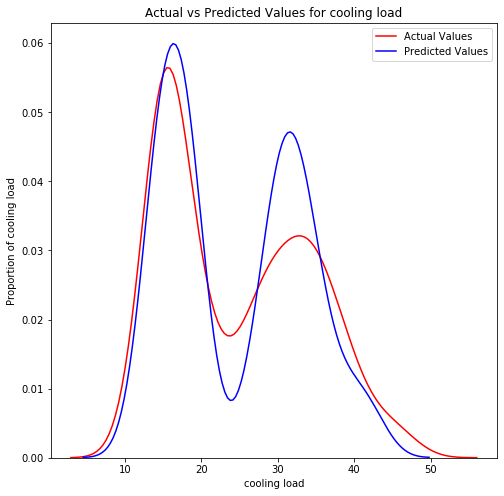

In [101]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(Y2, hist=False, color="r", label="Actual Values")
sns.distplot(Y2hat, hist=False, color="b", label="Predicted Values", ax=ax1)

plt.title("Actual vs Predicted Values for cooling load")
plt.xlabel("cooling load")
plt.ylabel("Proportion of cooling load")

plt.show()
plt.close()

The predicted values fit well to the actual values. There are stil differences at the values that have the largest proportion in the dataset. 

#### Overfitting, Underfitting

In [102]:
Y2hat_train = lm2.predict(X_train)
Y2hat_test = lm2.predict(X_test)

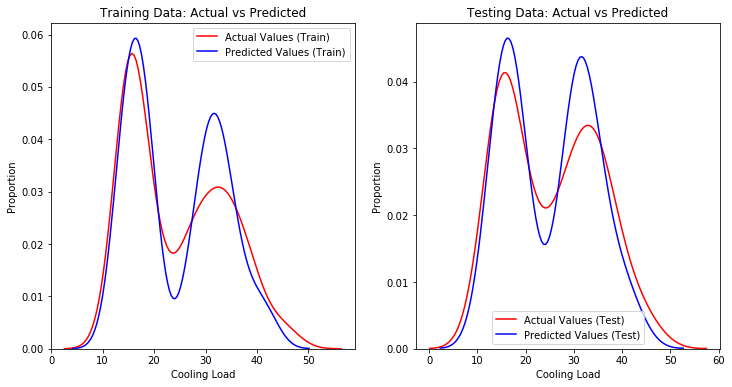

In [103]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Title = "Training Data: Actual vs Predicted"
distribution_plot(Y2_train, Y2hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
plt.xlabel("Cooling Load")
plt.subplot(1,2,2)
Title = "Testing Data: Actual vs Predicted"
distribution_plot(Y2_test, Y2hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)
plt.xlabel("Cooling Load")
plt.show()

In [104]:
Y2_train_mean = Y2_train.mean()
Y2hat_train_mean = Y2hat_train.mean()
display(Y2_train_mean, Y2hat_train_mean)

24.410765472312704

24.44821203175898

In [105]:
Y2_train_std = Y2_train.std()
Y2hat_train_std = Y2hat_train.std()
display(Y2_train_std, Y2hat_train_std)

9.476565802710192

8.81805242419577

In [106]:
Y2_test_mean = Y2_test.mean()
Y2hat_test_mean = Y2hat_test.mean()
display(Y2_test_mean,Y2hat_test_mean)

25.293441558441558

25.098475336856943

In [107]:
Y2_test_std = Y2_test.std()
Y2hat_test_std = Y2hat_test.std()
display(Y2_test_std, Y2hat_test_std)

9.657268750130573

8.835664956617478

**Comment**

* Training Set: equal means, 0.6 differences between the standard deviations. 
* Testing Set: difference of 0.2 between the means, difference of 0.8 between the standard deviations. 
* From the two graphs, we found the model fitted almost well into the dataset, the model fitted to the training set slightly better than to the testing set.

There could be improvement by deploying other models to fix the variation between actual and predict values.

# Report

Predict **heating load** using **relative compactness**
* Only 19.2% to 22.6% variation of the dataset can be explained using simple linear model.

Predict **heating load** using **relative compactness, surface area, wall area, roof area, glazing area and glazing area distribution**.

* 89.9 % variation of the whole dataset can be explained using this multiple linear regression model. 

Predict **cooling load** using **relative compactness, surface area, wall area, roof area, glazing area and glazing area distribution**.

* 86.8 % variation of the whole dataset can be explained using this multiple linear regression model. 

**Conclusion**: Multiple linear model is better than Simple linear model.